# Classifying images of hands as rock, paper or scissors.
Data for this notebook needs to be downloaded from http://www.laurencemoroney.com/rock-paper-scissors-dataset/.

The train and test sets are CGI generated images. The validation set is real images.

In [1]:
import tensorflow as tf
from tensorflow import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [2]:
# directories of the data sets
train_dir = 'data/rockpaperscissors/rps/'
test_dir = 'data/rockpaperscissors/rpt-test-set/'
val_dir = 'data/rockpaperscissors/rps-validation/'

In [3]:
# train data directories
rock_dir = train_dir + 'rock'
paper_dir = train_dir + 'paper'
scissors_dir = train_dir + 'scissors'

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print(rock_files[:10])
print(paper_files[:10])
print(scissors_files[:10])

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


View the first two pictures from each class.

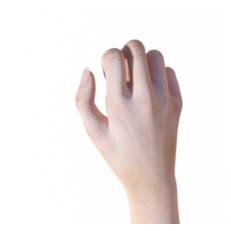

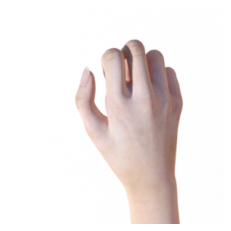

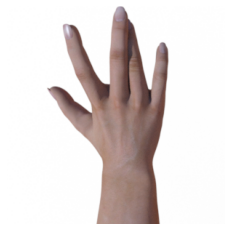

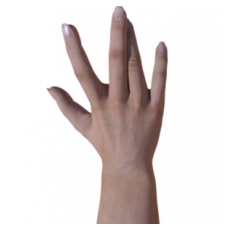

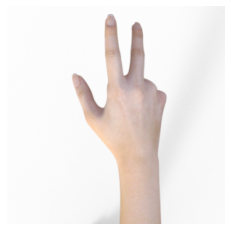

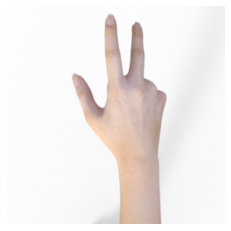

In [4]:
next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[0:2]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[0:2]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[0:2]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

Since the files are already in separate directories based on their class, this will automatically detect them as separate classes so I don't need to specify each directory. This is done for each of the data sets.

ImageDataGenerator pretty much handles the images for me. These generators are passed directly to the model.fit() function without needing to do any further processing of the images.

In [5]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    class_mode = 'categorical'
)

Found 372 images belonging to 3 classes.


Define the model. This model has 4 layers of convolution.

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)), # bigger image size
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(), # flatten results of previous layers for the neural network
    keras.layers.Dropout(0.5), # 50% chance of throwing out a neuron. Can improve efficiency.
    keras.layers.Dense(512, activation='relu'), # one hidden layer with 512 neurons
    keras.layers.Dense(3, activation='softmax') # output layer with 3 possible classes
])

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Train the model. The generators are passed directly to the model. No need to specify the labels since that info was already captured by the generators when it read the files from each directory (rock, paper and scissors folders).

In [9]:
history = model.fit(train_generator, epochs=25, validation_data=test_generator, verbose=1)

Epoch 1/25
79/79 [==============================] - 212s 3s/step - loss: 0.9041 - accuracy: 0.6052 - val_loss: 0.6944 - val_accuracy: 0.6667
Epoch 2/25
79/79 [==============================] - 112s 1s/step - loss: 0.0878 - accuracy: 0.9683 - val_loss: 0.7992 - val_accuracy: 0.8548
Epoch 3/25
79/79 [==============================] - 115s 1s/step - loss: 0.0575 - accuracy: 0.9861 - val_loss: 0.7911 - val_accuracy: 0.8441
Epoch 4/25
79/79 [==============================] - 113s 1s/step - loss: 0.0112 - accuracy: 0.9976 - val_loss: 1.4792 - val_accuracy: 0.8790
Epoch 5/25
79/79 [==============================] - 117s 1s/step - loss: 0.0318 - accuracy: 0.9960 - val_loss: 2.7155 - val_accuracy: 0.7527
Epoch 6/25
79/79 [==============================] - 106s 1s/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 1.5213 - val_accuracy: 0.8065
Epoch 7/25
79/79 [==============================] - 103s 1s/step - loss: 1.8533e-04 - accuracy: 1.0000 - val_loss: 2.7068 - val_accuracy: 0.7661
Epoch 8/2

In [17]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

Plot the train and test accuracy. This is probably overfitting since it has almost 100% accuracy on the training data and lower accuracy on the test data.

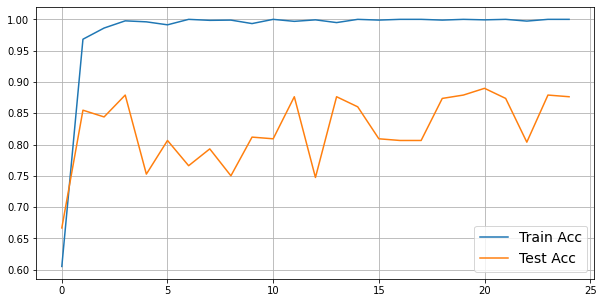

In [22]:
plt.figure(figsize=(10,5))
plt.plot(train_acc, label='Train Acc')
plt.plot(test_acc, label='Test Acc')
plt.legend(fontsize=14)
plt.grid()
plt.show()

Make predictions on the validation data. The file name tells the class of each image. The prediction is the label along the bottom of the image.

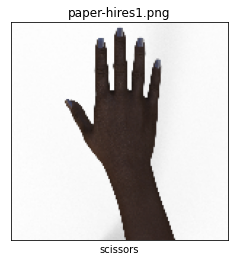

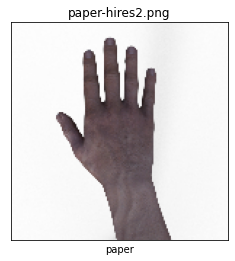

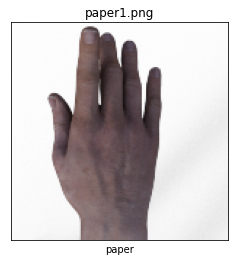

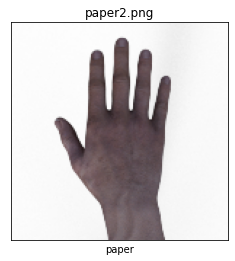

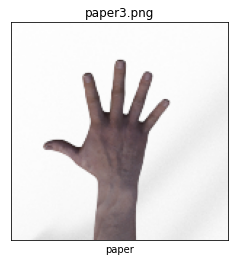

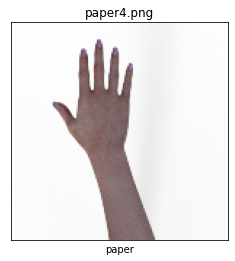

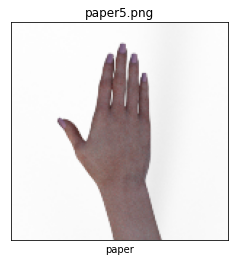

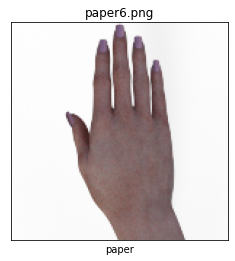

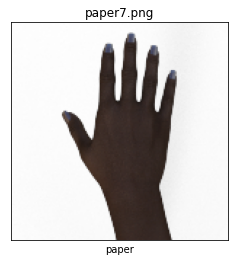

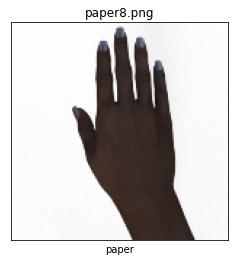

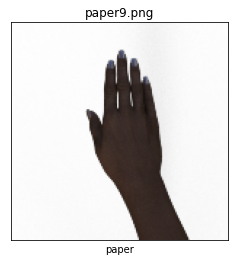

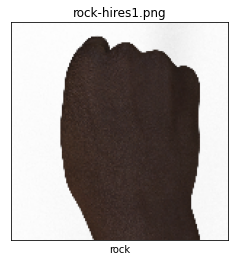

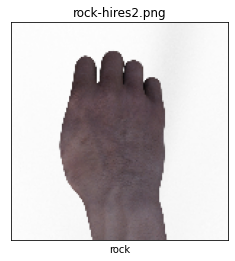

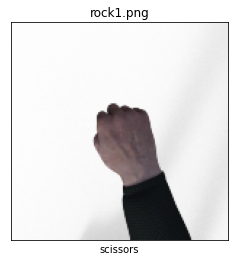

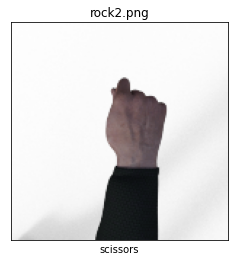

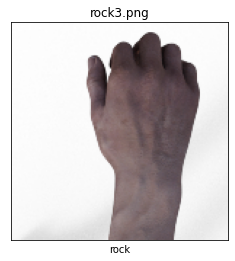

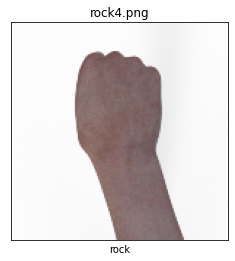

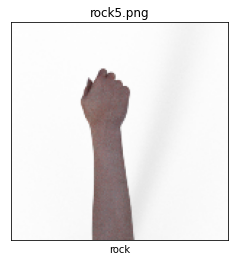

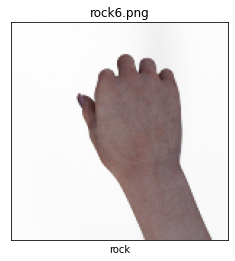

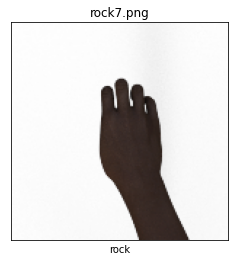

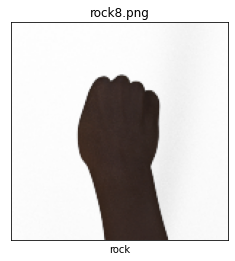

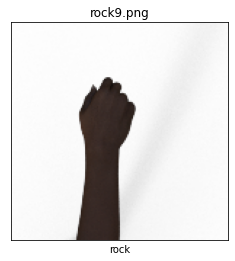

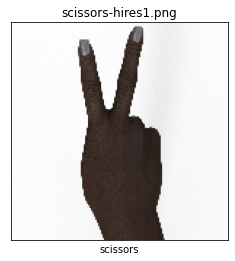

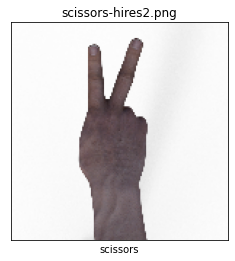

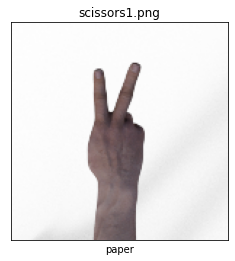

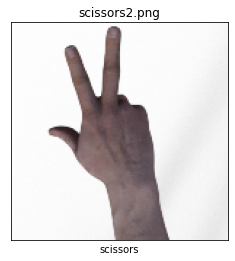

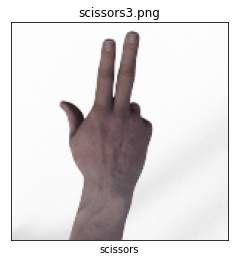

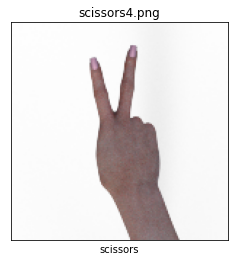

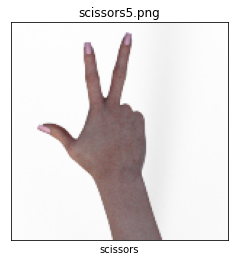

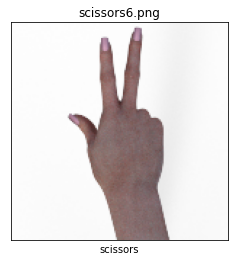

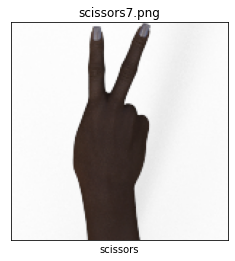

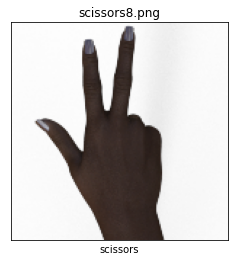

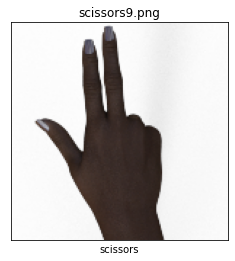

In [37]:
class_names = {
    0: 'paper',
    1: 'rock',
    2: 'scissors'
}

val_files = [fname for fname in os.listdir(val_dir)]

for fname in val_files:
    path = val_dir + fname
    img = image.load_img(path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    
    # show the images and the prediction
    plt.xticks([])
    plt.yticks([])
    plt.title(fname)
    plt.xlabel(class_names[np.argmax(classes)])
    plt.imshow(img)
    plt.show()